In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [2]:
data=pd.read_csv('botswana.tsv','\t')
data_ish=data
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [3]:
data.religion.value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

In [4]:
#2задача
data.heduc.isnull().sum()

2405

In [5]:

len(data)-(data.isnull().sum(axis = 1)>0).sum()

1834

3 задача

In [6]:
#data.nevermarr=data.agefm.isnull()
data.agefm.isnull()

0        True
1       False
2       False
3        True
4       False
        ...  
4356     True
4357     True
4358     True
4359    False
4360    False
Name: agefm, Length: 4361, dtype: bool

In [7]:
data.loc[data.agefm.isnull(), 'nevermarr'] = 1 
data.loc[~data.agefm.isnull(), 'nevermarr'] = 0

In [8]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0,0.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0,0.0


In [9]:
data=data.drop('evermarr', axis=1)
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0.0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0.0


In [10]:
#data[data.agefm.isnull()==True]['agefm']=0
data['agefm']=data['agefm'].fillna(0)
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0.0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0.0


In [11]:
data.heduc.value_counts()

0.0     692
7.0     396
10.0    210
6.0     102
12.0     99
4.0      73
3.0      64
5.0      62
2.0      47
15.0     35
9.0      35
14.0     29
16.0     26
1.0      25
17.0     17
8.0      17
11.0      9
13.0      8
18.0      4
19.0      4
20.0      2
Name: heduc, dtype: int64

In [14]:
data.nevermarr==1

0        True
1       False
2       False
3        True
4       False
        ...  
4356     True
4357     True
4358     True
4359    False
4360    False
Name: nevermarr, Length: 4361, dtype: bool

In [22]:
data.loc[data.nevermarr==1, 'heduc'] = -1 
data.head(10)

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0.0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0.0
5,1,30,5,spirit,5.0,1.0,0.0,24.0,7.0,1,1.0,0.0,0.0,0.0,0.0
6,3,42,4,other,3.0,1.0,0.0,15.0,11.0,1,1.0,0.0,1.0,0.0,0.0
7,1,36,7,other,4.0,1.0,1.0,24.0,9.0,1,1.0,0.0,0.0,0.0,0.0
8,4,37,16,catholic,4.0,1.0,1.0,26.0,17.0,1,1.0,1.0,1.0,1.0,0.0
9,1,34,5,protestant,4.0,1.0,1.0,18.0,3.0,1,0.0,1.0,0.0,0.0,0.0


In [21]:
data.heduc.isnull().sum()

123

4 задание

In [ ]:
#idlnchld, heduc и usemeth
#idlnchld_noans, heduc_noans, usemeth_noans

In [38]:
#Создали новые столбцы
data.loc[:,'idlnchld_noans']=data.idlnchld.isnull().astype(int)
data.loc[:,'heduc_noans']=data.heduc.isnull().astype(int)
data.loc[:,'usemeth_noans']=data.usemeth.isnull().astype(int)
#В существующих заменим значения согласно заданию
data.loc[data.idlnchld.isnull(),'idlnchld']=-1
data.loc[data.heduc.isnull(),'heduc']=-2
data.loc[data.usemeth.isnull(),'usemeth']=-1


data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0.0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0.0,0,0,0


In [49]:
#Остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. 
#Их очень мало, так что удалите объекты, на которых их значения пропущены.
index_to_drop=data.loc[data.knowmeth.isnull() | data.electric.isnull() | 
         data.radio.isnull()| data.tv.isnull()| data.bicycle.isnull(),:].index

In [59]:
index_to_drop

Int64Index([114, 821, 1179, 1327, 2353, 3748, 3931, 4001, 4172, 4173, 4243,
            4248, 4260],
           dtype='int64')

In [55]:
data=data.drop(index_to_drop)
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0.0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1.0,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0.0,0,0,0


In [65]:
import numpy as np
np.shape(data)

(4348, 18)

In [66]:
4348*18

78264

5 задание

In [68]:
m1 = smf.ols('ceb ~ age+educ+religion+idlnchld+knowmeth+usemeth+agefm+heduc+urban+electric+radio+tv+bicycle+nevermarr+idlnchld_noans+heduc_noans+usemeth_noans', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        18:48:44   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

NameError: name 'pylab' is not defined

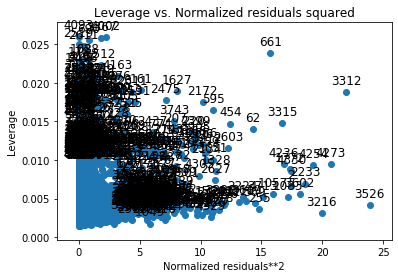

In [76]:
#plt.figure(figsize(8,7))
plot_leverage_resid2(fitted)
pylab.show()

In [79]:
data.loc[[661,3312,3526]]

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
661,11,47,0,other,-1.0,1.0,1.0,39.0,-2.0,1,0.0,1.0,0.0,0.0,0.0,1,1,0
3312,11,46,0,other,3.0,0.0,0.0,44.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
3526,13,45,0,protestant,6.0,1.0,0.0,27.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0


7 задача

In [81]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [86]:
m2 = smf.ols('ceb ~ age+educ+religion+idlnchld+knowmeth+usemeth+agefm+heduc+urban+electric+radio+tv+bicycle+nevermarr+idlnchld_noans+heduc_noans+usemeth_noans', data=data)
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        19:22:29   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

8 задача

In [101]:
m3 = smf.ols('ceb ~ age+educ+idlnchld+knowmeth+usemeth+agefm+heduc+urban+electric+bicycle+nevermarr+idlnchld_noans+heduc_noans+usemeth_noans', data=data)
fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        19:41:57   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [102]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [103]:
print("F=%f, p=%f, k1=%f" % m2.fit().compare_f_test(m3.fit()))

F=0.919236, p=0.467231, k1=5.000000


9 задача

In [104]:
m4 = smf.ols('ceb ~ age+educ+idlnchld+knowmeth+agefm+heduc+urban+electric+bicycle+nevermarr+idlnchld_noans+heduc_noans', data=data)
fitted = m4.fit()#cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        19:42:06   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.

In [105]:
m3.fit().compare_f_test(m4.fit())
#Достигаемый уровень значимости маленький, возвращаем значкения

(92.89058230109622, 3.1552009480426394e-40, 2.0)

In [106]:
fitted = m4.fit(cov_type='HC1')

10 задача

In [107]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        19:44:22   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.